In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [6]:
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [7]:
df = df.drop(["education"], axis=1)

In [8]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
df.loc[df["currentSmoker"] == 1, "cigsPerDay"] = df.loc[df["currentSmoker"] == 1, "cigsPerDay"].fillna(df["cigsPerDay"].mean())
df["BPMeds"] = df["BPMeds"].fillna(0)
df["totChol"] = df["totChol"].fillna(df["totChol"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["heartRate"] = df["heartRate"].fillna(round(df["heartRate"].mean()))
df["glucose"] = df["glucose"].fillna(df["glucose"].mean())

In [11]:
df.loc[df.duplicated()]
# No duplicated data points

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


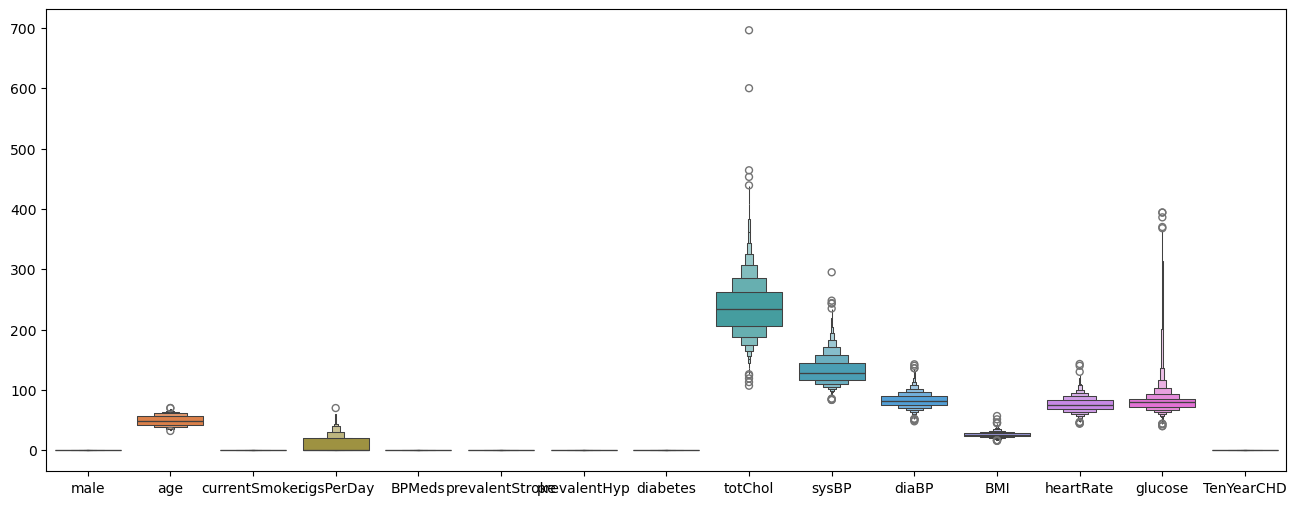

In [12]:
plt.figure(figsize=(16, 6))
sns.boxenplot(data=df)
plt.show()

In [13]:
df = df.drop(df[df["totChol"] > 400].index)

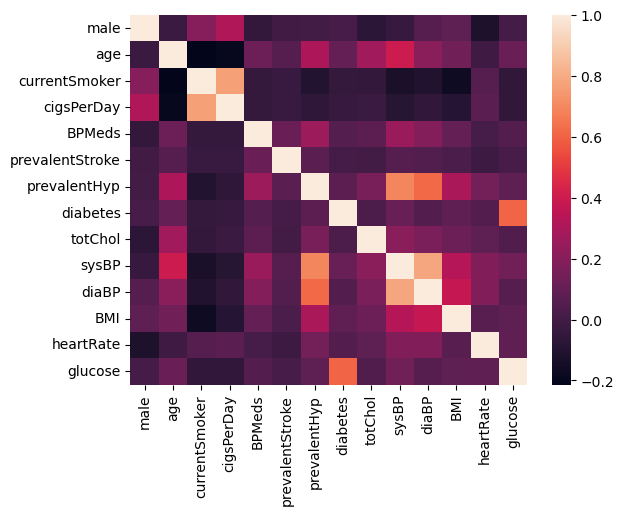

In [14]:
sns.heatmap(df.drop(columns="TenYearCHD").corr())
plt.show()

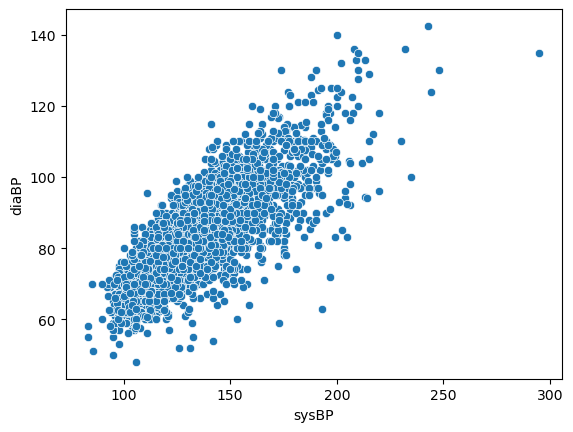

In [15]:
sns.scatterplot(x="sysBP", y="diaBP", data=df)
plt.show()

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))

X = df.drop(columns="TenYearCHD")
y = df["TenYearCHD"]

X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.3)

X = scaler.fit_transform(X)

In [31]:
def get_score(model, X_train, X_validation, y_train, y_validation):
    model.fit(X_train, y_train)
    return model.score(X_validation, y_validation)

In [33]:
scores = np.array([])

log_regressor = LogisticRegression(max_iter=3000)
kf = StratifiedKFold(n_splits=10)
for train_index, validation_index in kf.split(X_train_validation, y_train_validation):
    X_train, X_validation= df.iloc[train_index].drop(columns="TenYearCHD"), df.iloc[validation_index].drop(columns="TenYearCHD")
    y_train, y_validation = df.iloc[train_index]["TenYearCHD"], df.iloc[validation_index]["TenYearCHD"]
    
    score = get_score(log_regressor, X_train, X_validation, y_train, y_validation)
    scores = np.append(scores, score) 

print(scores)
print(scores.mean())

[0.80067568 0.86824324 0.86486486 0.84797297 0.88851351 0.87162162
 0.86486486 0.83445946 0.875      0.84745763]
0.8563673843334861


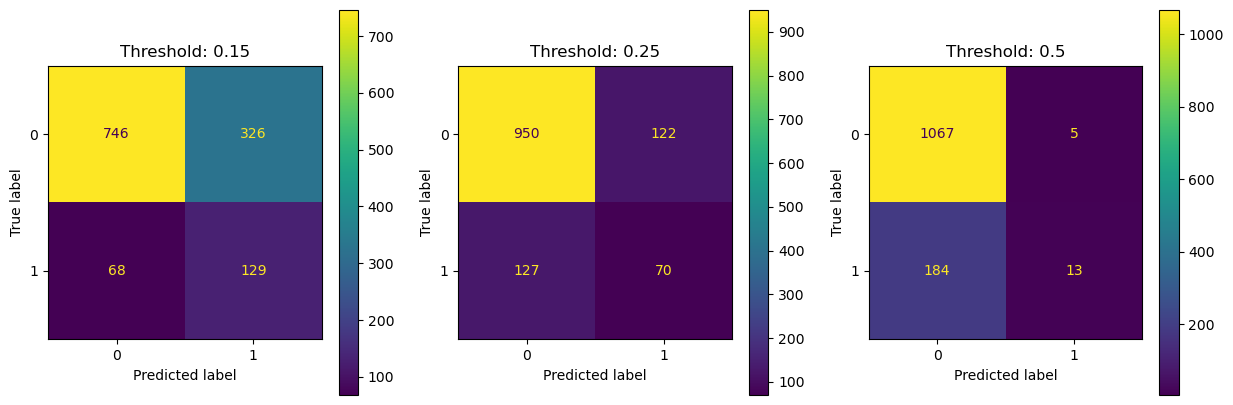

In [ ]:
y_test_predictions_with_threshold_15 = (log_regressor.predict_proba(X_test)[:, 1] >= 0.15).astype(int)
y_test_predictions_with_threshold_25 = (log_regressor.predict_proba(X_test)[:, 1] >= 0.25).astype(int)

y_test_predictions_with_threshold_05 = log_regressor.predict(X_test)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title("Threshold: 0.15")
ax[1].set_title("Threshold: 0.25")
ax[2].set_title("Threshold: 0.5")

cf_matrix_15 = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predictions_with_threshold_15, ax=ax[0])
cf_matrix_25 = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predictions_with_threshold_25, ax=ax[1])
cf_matrix_05 = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predictions_with_threshold_05, ax=ax[2])


plt.show()

In [35]:
# Precision: All targets 1 with label 1 / all with label 1

# Recall: all targets 1 with label 1  / all targets 1

predictions = y_test_predictions_with_threshold_15

targets_1 = y_test.sum()
label_1 = predictions.sum()
targets_1_label_1 = y_test[predictions == 1].sum()

precision = targets_1_label_1 / label_1
recall = targets_1_label_1 / targets_1
f1_score = 2 * precision * recall / (precision + recall)

print("Stats for target 1:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

# print(classification_report(y_test, predictions))
# Next time: Use ROC

Stats for target 1:
Precision: 0.2835164835164835
Recall: 0.6548223350253807
F1-Score: 0.39570552147239263
